# **Classifying Breast Cancer Tumors with Machine Learning:** 
## *Random Forest and Decision Tree Algorithms*

## *Author: Molly Davis (mdavi258@uncc.edu)*

## Introduction: 
Breast cancer is the most common cancer among women worldwide. An accurate and swift diagnosis is a priority. By visualizing and analyzing lumps in the breast area with x-ray imaging, we can predict whether the tumor is benign (non-cancerous) or malignant (cancerous). Machine learning is a great tool to use to help identify tumors efficiently. Breast cancer data from Winsconsin was used with two supervised machine learning algorithms such as Random Forest and Decision Tree (Gupta and Garg, 2020). The features of the dataset include radius, texture, area, etc. The random forest model was used to determine accuracy of the prediction and decision tree model used to determine the importance of speed (T R, 2015). By comparing machine models, we can determine which model is most accurate or faster in predicting and diagnosing breast cancer tumors. 




In [ ]:
# Imports and Packages 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV

# Part I: Open and Preview Dataset



* The features from the dataset are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image. These images helped classify whether the tumors were malignant or benign. 



In [ ]:
# Obtian data from google drive location or the following link: https://www.kaggle.com/datasets/nancyalaswad90/breast-cancer-dataset?resource=download 
from google.colab import drive
drive.mount("/drive")

# Import the dataset from drive link: https://drive.google.com/file/d/1VLhlo9RPVpUwndz6akfg64sAm_akVSKK/view?usp=sharing 
df = pd.read_csv("/drive/My Drive/Assignment3_Molly/data.csv")

# Preview the dataset
df.head()

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data Summary 

In [ ]:
# Get an idea of what data type you are working with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Get a description of each feature like the count, average, and standard deviation
df.describe(include = 'all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [ ]:
# See which features have a high unique count and low unique count to detmine what kind of visualizations could be used like bar graphs or a pair plot
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave_points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave_points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave_points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [ ]:
# Make sure there arent any NA 
df.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave_points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave_points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave_points_worst       False
symmetry_w

# Part II: Data Visualization

In [ ]:
# See which features have much importance in classifying between malignant and benign
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

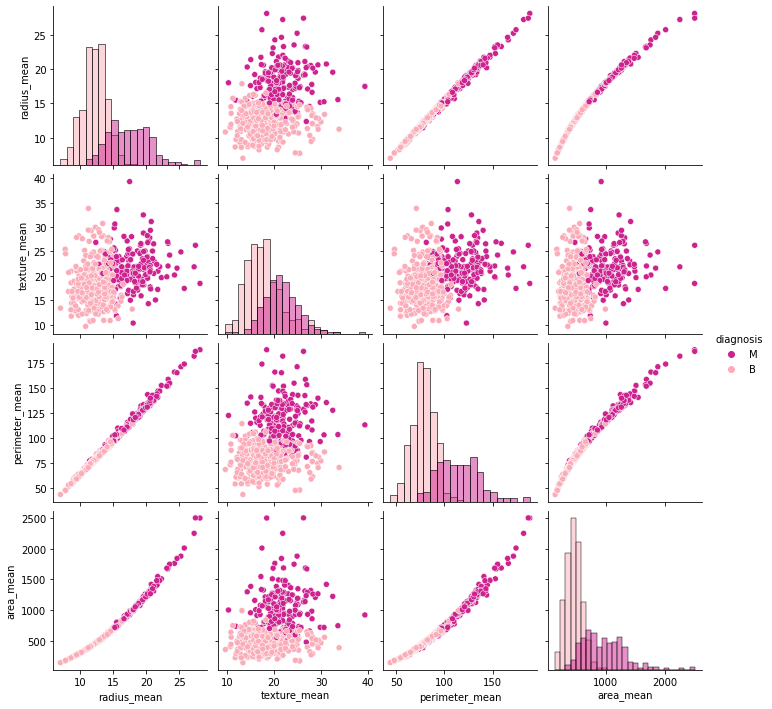

In [ ]:
# Choose which columns to use in pairplot
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]
# Seaborn (sns) pairplot compares malignant and benign differences in radius, texture, perimeter, and area in averages
sns.pairplot(df[cols], hue= "diagnosis",diag_kind="hist", palette= "RdPu_r")
plt.show() 

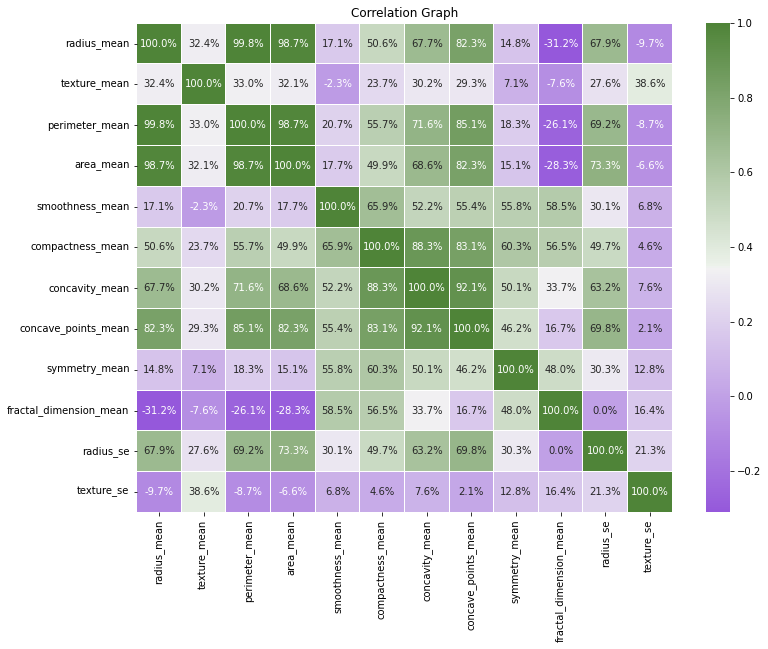

In [ ]:
# Use more features for a correlation heat map
cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se']
# Size of figure
plt.figure(figsize=(12, 9))
# Title of figure
plt.title("Correlation Graph")
# Use sns or seaborn to help choose structure of heatmap
cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
# Plot the heatmap and the selected features and discover correlations
sns.heatmap(df[cols].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap);

## Discussion: 
Visualizing the dataset is extremely important. We want to identify and relationships or correlations in the data and highlight those as much as possible so predictions can be accurate. Our goal is to encourage confident data-driven decision making. The pairplot visualizes the differences between malignant and benign tumors and that those differences are obvious for diagnosis at times. The heat map or correlation graph highlights the relationships between the features themselves. We can see that the averages have high coorelation. Radius, perimeter, area, and concavity have some high correlations.   

# Part III: Data Filtering and Normalization

In [ ]:
# LabelEncoder() is used to normalize labels. It can also be used to transform non-numerical labels to numerical labels
labelencoder_Y = LabelEncoder()
# We want to change any letter data points to numerical
df.diagnosis = labelencoder_Y.fit_transform(df.diagnosis)
# Display the normalized data
df.head()
# We can see that the diagnosis feature was change from letters M & B to now 1 & 0

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Part IV: Model Implementation

In [ ]:
# Define which features we would like to use in prediction
prediction_feature = [ "radius_mean",  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave_points_mean']
# Define which target feature we want to be predicted 
targeted_feature = 'diagnosis'

In [ ]:
# Define the X
X = df[prediction_feature]
X

,radius_mean,perimeter_mean,area_mean,symmetry_mean,compactness_mean,concave_points_mean
0,17.99,122.80,1001.0,0.2419,0.27760,0.14710
1,20.57,132.90,1326.0,0.1812,0.07864,0.07017
2,19.69,130.00,1203.0,0.2069,0.15990,0.12790
3,11.42,77.58,386.1,0.2597,0.28390,0.10520
4,20.29,135.10,1297.0,0.1809,0.13280,0.10430
...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.1726,0.11590,0.13890
565,20.13,131.20,1261.0,0.1752,0.10340,0.09791
566,16.60,108.30,858.1,0.1590,0.10230,0.05302
567,20.60,140.10,1265.0,0.2397,0.27700,0.15200


In [ ]:
# Define the y
y = df.diagnosis
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

# Part V: DataSplit and Scaling
## TrainingSet and TestingSet 

In [ ]:
# Split the data into training and testing sets by a test size of 0.33 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)
# Display the training data
print(X_train)

     radius_mean  perimeter_mean  area_mean  symmetry_mean  compactness_mean  \
274        17.93          115.20      998.9         0.1538           0.07027   
189        12.30           78.83      463.7         0.1667           0.07253   
158        12.06           76.84      448.6         0.1590           0.05241   
257        15.32          103.20      713.3         0.2398           0.22840   
486        14.64           94.21      666.0         0.1409           0.06698   
..           ...             ...        ...            ...               ...   
85         18.46          121.10     1075.0         0.2132           0.10530   
199        14.45           94.49      642.7         0.1950           0.12060   
156        17.68          117.40      963.7         0.1971           0.16650   
384        13.28           85.79      541.8         0.1617           0.08575   
456        11.63           74.87      415.1         0.1799           0.08574   

     concave_points_mean  
274         

## Optional: Learning Curve

A learning curve is optional at this point mainly because SVC algorithm is only available for this visualization but I still wanted to show that this resource was available and shows how well the data can be trained overall. We obviously see that the training scores are high and the data works well with the SVC model. 

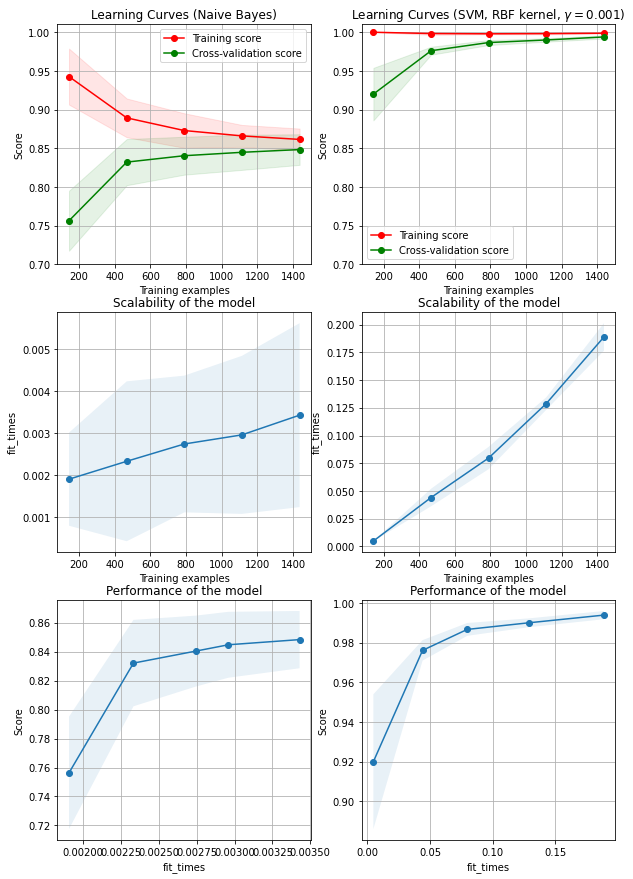

In [ ]:
# Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = load_digits(return_X_y=True)

title = "Learning Curves (Naive Bayes)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=axes[:, 0],
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

## Scale the Data

In [ ]:
# StandardScaler removes the mean and scales each feature/variable to unit variance
sc = StandardScaler()
# Fit to training data, then transform it
X_train = sc.fit_transform(X_train)
# Fit to testing data, then transform it
X_test = sc.fit_transform(X_test)

# Part VI: Model Selection and Prediction 

Now it is time to select our model algorithms random forest and decision tree then make predictions with our split data. The goal is to see high accuracy and AUC. We cannot just rely on the accuracy score because accuracy is not always the best metric to use to assess classification models (Long, 2019). To solidify our choice in a model we will use the AUC (area under curve) from a ROC curve. This is because ROC curves are helpful with understanding the balance between true-positive rate and false positive rates (Long, 2019).  

## Random Forest 

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       115
           1       0.93      0.86      0.89        73

    accuracy                           0.92       188
   macro avg       0.92      0.91      0.91       188
weighted avg       0.92      0.92      0.92       188



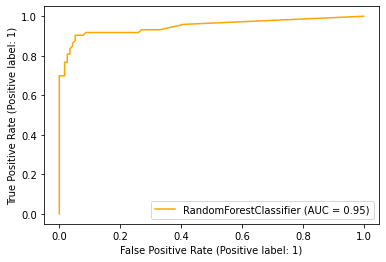

In [ ]:
# Define and use the random forest algorithm 
rf = RandomForestClassifier()
# Fit is used to compute the mean and std to be used for later scaling
rf.fit(X_train,y_train)
# Predict the testing data
pred = rf.predict(X_test)
# Compute confusion matrix to evaluate the accuracy of a classification
cm = confusion_matrix(y_test,pred)
# Display the report of the random forest classifier
print(classification_report(y_test,pred))
# See the ROC curve to determine the performance of the classification model
rf_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test, color = "orange")

In [ ]:
# Display the acuuracy score from the random forest classifier
print("Accuracy Score = {}".format(round(accuracy_score(y_test,pred),5)))

Accuracy Score = 0.92021


Text(0.5, 15.0, 'Predicted Values')

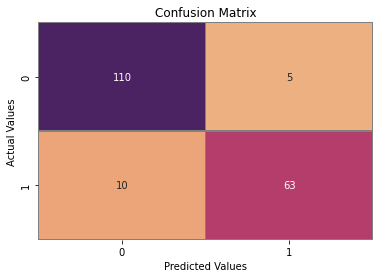

In [ ]:
# Use seaborn to create a heatmap to display the actual values and predicted values for benign and malignant 
sns.heatmap(cm, annot = True, fmt = 'g', cbar = False, cmap = 'flare', linewidths= 0.5, linecolor= 'grey')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

## Decision Tree

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       115
           1       0.91      0.82      0.86        73

    accuracy                           0.90       188
   macro avg       0.90      0.88      0.89       188
weighted avg       0.90      0.90      0.90       188



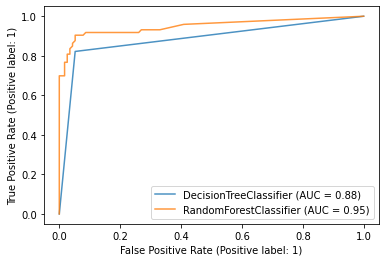

In [ ]:
# Define and use the decision tree algorithm 
dt = DecisionTreeClassifier()
# Fit is used to compute the mean and std to be used for later scaling
dt.fit(X_train,y_train)
# Predict the testing data
predict = dt.predict(X_test)
# Compute confusion matrix to evaluate the accuracy of a classification
CM = confusion_matrix(y_test,predict)
# Display the report of the decision tree classifier
print(classification_report(y_test,predict))
# Compare the performace of both classification models with AUC (area under curve) 
ax = plt.gca()
dt_disp = RocCurveDisplay.from_estimator(dt, X_test, y_test, ax=ax, alpha=0.8)
rf_disp.plot(ax=ax, alpha=0.8)

In [ ]:
# Display the acuuracy score from the decision tree classifier
print("Accuracy Score = {}".format(round(accuracy_score(y_test,predict),5)))

Accuracy Score = 0.89894


Text(0.5, 15.0, 'Predicted Values')

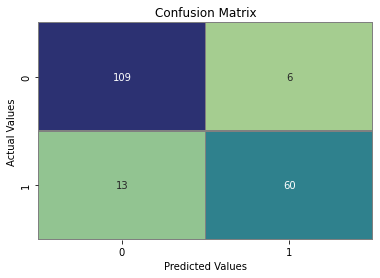

In [ ]:
# Use seaborn to create a heatmap to display the actual values and predicted values for benign and malignant
sns.heatmap(CM, annot = True, fmt = 'g', cbar = False, cmap = 'crest', linewidths= 0.5, linecolor= 'grey')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

## Discussion:
The random forest accuracy score was 0.92021 and the decision tree accuracy score was 0.89894 (may differ on new run). The random forest classifier AUC on the ROC curve was 0.95 and the decision tree classifier AUC was 0.88. With random forest having a higher accuracy score and AUC we can say that it is the better classifier to use in our machine learning model to predict breat cancer tumors if we are focused on accuracy over speed. 

# Part VII: Hypertuning the Model

* With HyperTunning we can use GridSearchCV to know the best performing parameters and determine speed.

In [ ]:
# Pick the model
model = RandomForestClassifier()

# Tunning Params
random_grid = {'bootstrap': [True, False],
 'max_depth': [40, 50, None], # 10, 20, 30, 60, 70, 100,
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2], # , 4
 'min_samples_split': [2, 5], # , 10
 'n_estimators': [200, 400]} # , 600, 800, 1000, 1200, 1400, 1600, 1800, 2000

# Implement GridSearchCV
gsc = GridSearchCV(model, random_grid, cv=10) # 10 Cross Validation

# Model Fitting (Might take about 5 minutes to finish)
gsc.fit(X_train, y_train)

print("\n Best Score is: ")
print(gsc.best_score_)

print("\n Best Estimator is: ")
print(gsc.best_estimator_)

print("\n Best Parameters are: ")
print(gsc.best_params_)


 Best Score is: 
0.9132253711201079

 Best Estimator is: 
RandomForestClassifier(max_depth=50, max_features='sqrt', min_samples_split=5,
                       n_estimators=200)

 Best Parameters are: 
{'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# Pick the model
model = DecisionTreeClassifier()

# Tunning Params
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }

# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10) # For 10 Cross-Validation

gsc.fit(X_train, y_train) # Model Fitting (Takes about 3 seconds to finish)

print("\n Best Score is: ")
print(gsc.best_score_)

print("\n Best Estimator is: ")
print(gsc.best_estimator_)

print("\n Best Parameters are: ")
print(gsc.best_params_)


 Best Score is: 
0.9211201079622132

 Best Estimator is: 
DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=7)

 Best Parameters are: 
{'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 2}


# Conclusion

I chose to compare Random Forest and Decision Tree classifiers to prove that both have pros and cons. The random forest algorithm was able to have greater accuracy in predictions but decision tree was not far behind. While hypertuning, we can see that random forest took 5 times longer to finish, while decision tree only took approximately 3 seconds. When choosing a classification model its important to know which algorithm performs better for your dataset. Breast cancer diagnosis needs to be accurate and fast. I believe accuracy should be a priority for diagnosis as it is more important to accurately predict whether a tumor is benign or malignant. Overall, both classifiers show great promise in predicting breast cancer for deep learning. 

# References 

Aswad, N. (2022, June). Breast Cancer Dataset. Kaggle. https://www.kaggle.com/datasets/nancyalaswad90/breast-cancer-dataset

Deb, D. (2020, June 15). Comparing the performance of different machine learning algorithms. Dibyendu Deb. https://dibyendudeb.com/comparing-machine-learning-algorithms/

Gupta, P., & Garg, S. (2020). Breast Cancer Prediction using varying Parameters of Machine Learning Models. Procedia Computer Science, 171, 593–601. https://doi.org/10.1016/j.procs.2020.04.064

Long, A. (2019, February 9). Understanding Data Science Classification Metrics in Scikit-Learn in Python. Medium. https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019

Malviya, D. (2022, September). Heart disease prediction using Random Forest (80%). Kaggle. https://kaggle.com/code/deepmalviya7/heart-disease-prediction-using-random-forest-80

Okamura, S. (2020, December 30). GridSearchCV for Beginners. Medium. https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee

T R, P. (2015). A Comparative Study on Decision Tree and Random Forest Using R Tool. IJARCCE, 196–199. https://doi.org/10.17148/IJARCCE.2015.4142

Ukani, V. (2020). Breast Cancer Prediction Using Machine Learning. Kaggle. https://kaggle.com/code/vikasukani/breast-cancer-prediction-using-machine-learning